In [1]:
#Importing all the necessarylibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install openpyxl

In [3]:
import openpyxl

In [4]:
#Loading the dataset
train = pd.read_csv("../data/agriculture/train_agriculture.csv")
train["source"]="train"

df = train
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


In [5]:
wb = openpyxl.load_workbook("../data/agriculture/test_agriculture.xlsx")
wb.get_sheet_names()

['Sheet1']

In [6]:
ws = wb['Sheet1']
test = pd.DataFrame(ws.values)
test["source"]="test"

test.head()


,0,1,2,3,4,5,6,7,8,source
0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,test
1,F00000002,188,1,1,1,0,None,0,2,test
2,F00000007,410,1,1,1,0,0,0,2,test
3,F00000011,626,1,0,1,0,0,0,2,test
4,F00000013,731,1,0,1,0,0,0,2,test


아래것 표로 만들어서 보기 좋게 만들기

In [7]:
# train df의 컬럼별 unique값
for i in df.columns:
    unq = df[i].unique()
    print("%s\n%d"%(i,len(unq)))
    
    if len(unq)<5:
        print(unq)
    print("==================")

ID
88858
Estimated_Insects_Count
71
Crop_Type
2
[1 0]
Soil_Type
2
[0 1]
Pesticide_Use_Category
3
[1 3 2]
Number_Doses_Week
20
Number_Weeks_Used
65
Number_Weeks_Quit
51
Season
3
[1 2 3]
Crop_Damage
3
[0 1 2]
source
1
['train']


In [8]:
# nunique(): 고유값의 수를 출력하는 함수
df.nunique()

ID                         88858
Estimated_Insects_Count       71
Crop_Type                      2
Soil_Type                      2
Pesticide_Use_Category         3
Number_Doses_Week             20
Number_Weeks_Used             64
Number_Weeks_Quit             51
Season                         3
Crop_Damage                    3
source                         1
dtype: int64

In [9]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'source'],
      dtype='object')

In [10]:
df.shape

(88858, 11)

In [11]:
# null값 확인
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

In [12]:
# 평균 값으로 대체
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(),inplace=True)

In [13]:
# null값 다시 확인
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

In [14]:
# dtype 확인
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
source                      object
dtype: object

- ID를 숫자로
- Number_Weeks_Used가 float임

<Figure size 864x360 with 0 Axes>

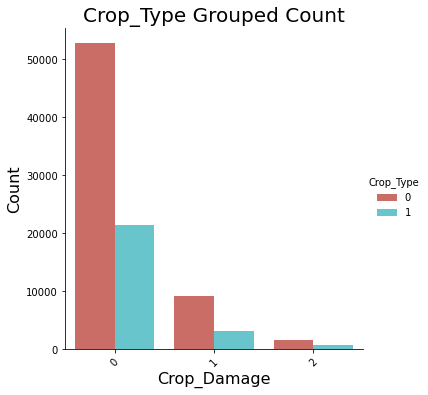

In [15]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

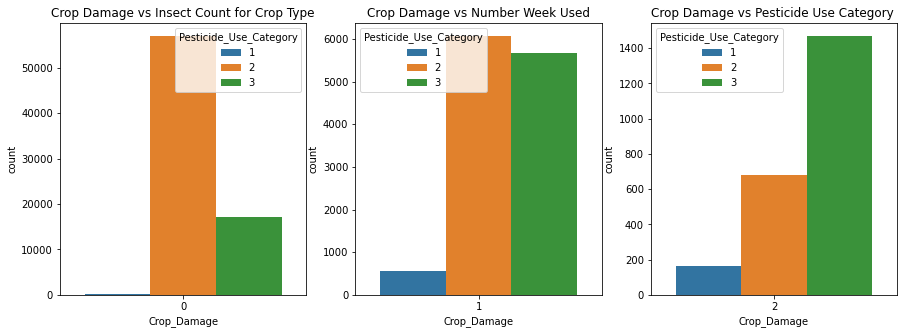

In [16]:
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1)
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2)
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3)
ax3.set_title("Crop Damage vs Pesticide Use Category ")

<Figure size 864x360 with 0 Axes>

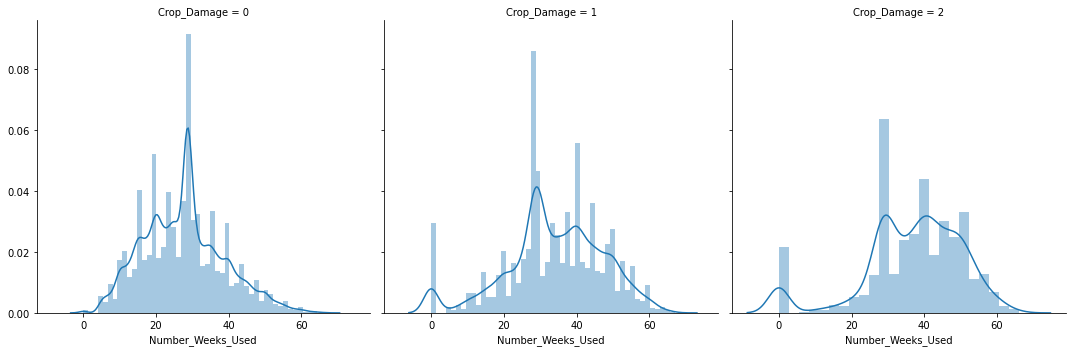

In [17]:
plt.figure(figsize=(12,5))
g= sns.FacetGrid(df, col='Crop_Damage',size=5)
g = g.map(sns.distplot, "Number_Weeks_Used")
plt.show()

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

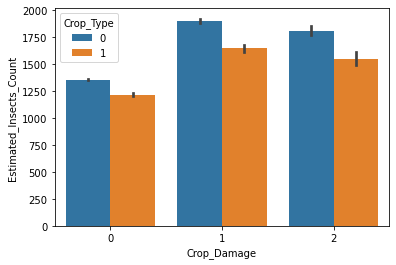

In [18]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df)

<Figure size 864x360 with 0 Axes>

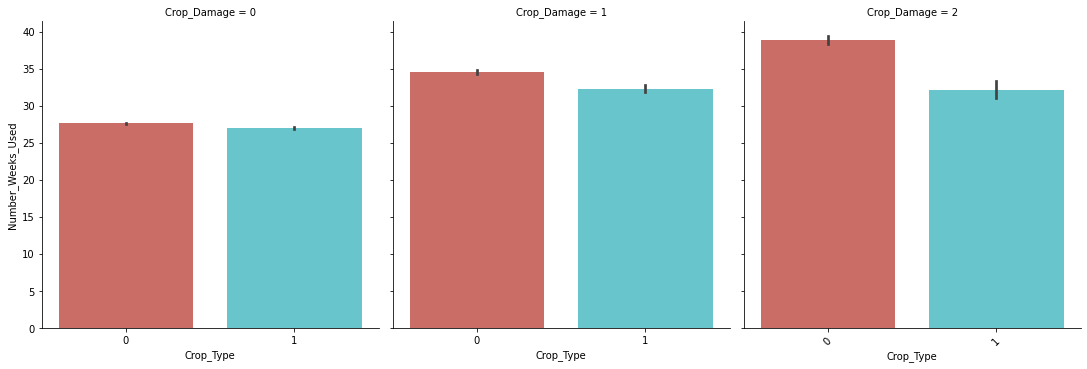

In [19]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df, palette="hls",kind='bar',col='Crop_Damage')
plt.xticks(rotation=45)
plt.show()

### 이상치

In [20]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.623970,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


- insect_count
- doses_week
- number_weeks_quit

In [21]:
df.drop(columns=["ID","source"],axis=1,inplace=True)
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

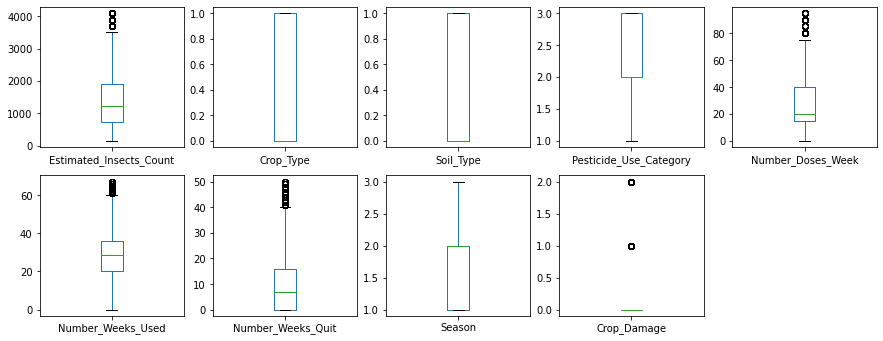

In [22]:
# box plot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [23]:
# 평균 값으로 대체
df.loc[df['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.mean(df["Number_Weeks_Used"])
df.loc[df['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.mean(df["Estimated_Insects_Count"])
df.loc[df['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.mean(df["Number_Weeks_Quit"])
df.loc[df['Number_Doses_Week']>80,'Number_Doses_Week'] = np.mean(df["Number_Doses_Week"])
    

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

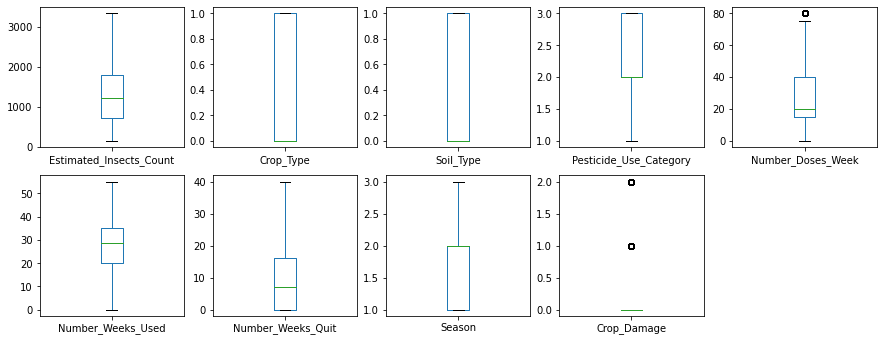

In [24]:
# box plot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

### Skew Analysis: 왜도 = 쏠림 현상

In [25]:
df.skew()

Estimated_Insects_Count    0.647325
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.911044
Number_Weeks_Used          0.117167
Number_Weeks_Quit          0.831183
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

array([[<AxesSubplot:title={'center':'Estimated_Insects_Count'}>,
        <AxesSubplot:title={'center':'Crop_Type'}>,
        <AxesSubplot:title={'center':'Soil_Type'}>,
        <AxesSubplot:title={'center':'Pesticide_Use_Category'}>],
       [<AxesSubplot:title={'center':'Number_Doses_Week'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Used'}>,
        <AxesSubplot:title={'center':'Number_Weeks_Quit'}>,
        <AxesSubplot:title={'center':'Season'}>],
       [<AxesSubplot:title={'center':'Crop_Damage'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

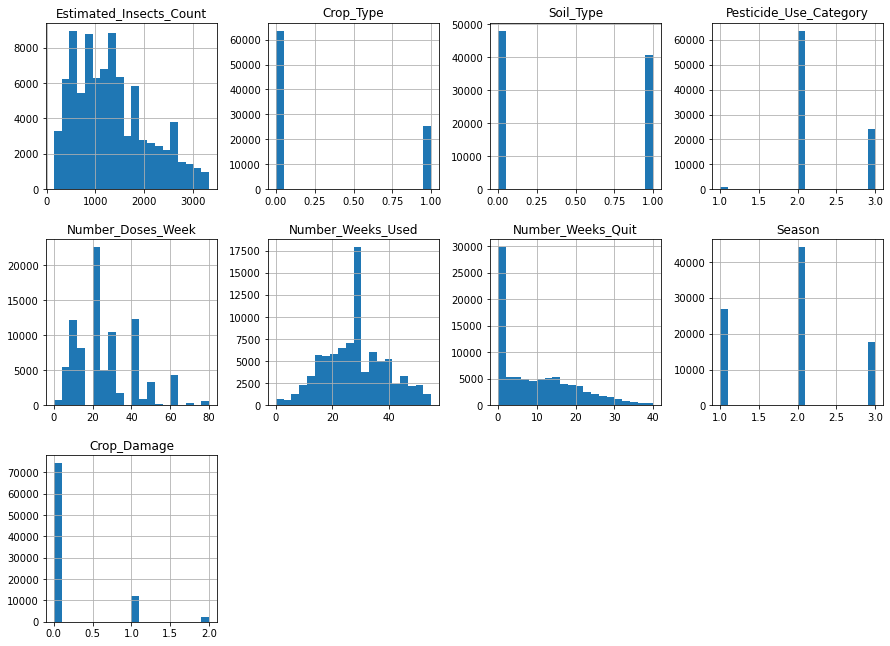

In [26]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

In [27]:
#Importing libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

In [28]:
# Dropping region and Day from x for classifcation dataset
#Assigning the value of x for testing and training
df_xc=df.drop(columns=['Crop_Damage'])
yc=df[["Crop_Damage"]]

In [29]:
#Bring every column to common scale by using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc = sc.fit_transform(df_xc)
df_xc=pd.DataFrame(xc,columns=df_xc.columns)

In [30]:
#defining a function to find accuracy score, crossvalidation score for the given dataset
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.33,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print('\033[1m',"Results for model : ",names,'\n','\033[0m'
          "max accuracy score is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print("*"*100)

In [31]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB',GaussianNB()))


for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)

 Results for model :  Random Forest 
 max accuracy score is 0.8277520120038194 
 Mean accuracy score is :  0.8226833756281129 
 Std deviation score is :  0.0013434214123374823 
 Cross validation scores are :   [0.82568085 0.82191087 0.82202341 0.82206966 0.82257611]
****************************************************************************************************
 Results for model :  KNN 
 max accuracy score is 0.8303778474969309 
 Mean accuracy score is :  0.827061142727444 
 Std deviation score is :  0.0016961545029556733 
 Cross validation scores are :   [0.82950709 0.82765024 0.82500563 0.82786562 0.82527714]
****************************************************************************************************
 Results for model :  Decision Tree Classifier 
 max accuracy score is 0.753035056608921 
 Mean accuracy score is :  0.7474284768991878 
 Std deviation score is :  0.0025696941301892296 
 Cross validation scores are :   [0.75135044 0.74639883 0.747693   0.74542794 0.74700355

In [32]:
# Estimating best n_neighbors using grid search CV for KNeighborsClassifier

kNN=KNeighborsClassifier()
parameters={"n_neighbors":range(2,30)}
clf = GridSearchCV(kNN, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'n_neighbors': 22}

In [33]:
#Again running KNeighborsClassifier with n_neighbor = 22
kNN=KNeighborsClassifier(n_neighbors=22)
max_acc_score("KNeighbors Classifier",kNN,df_xc,yc)

 Results for model :  KNeighbors Classifier 
 max accuracy score is 0.8431660073659801 
 Mean accuracy score is :  0.8419838325515553 
 Std deviation score is :  0.0012446134971586757 
 Cross validation scores are :   [0.84273014 0.84323655 0.84059194 0.84300264 0.84035789]
****************************************************************************************************


In [34]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
kNN.fit(xc_train,yc_train)
yc_pred=kNN.predict(xc_test)

accuracy score is :  0.8405356740940806
classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91     14848
           1       0.48      0.17      0.25      2461
           2       0.33      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.56      0.38      0.39     17772
weighted avg       0.79      0.84      0.80     17772



<AxesSubplot:>

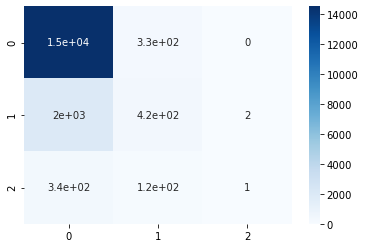

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "Blues")

In [36]:
#Using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10,learning_rate=1)
ad.fit(xc_train,yc_train)
ad_pred=ad.predict(xc_test)
print(accuracy_score(yc_test,ad_pred))
print(confusion_matrix(yc_test,ad_pred))
print(classification_report(yc_test,ad_pred))

0.8400855277965339
[[14830    18     0]
 [ 2361   100     0]
 [  429    34     0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     14848
           1       0.66      0.04      0.08      2461
           2       0.00      0.00      0.00       463

    accuracy                           0.84     17772
   macro avg       0.50      0.35      0.33     17772
weighted avg       0.79      0.84      0.77     17772

